# **Factors of Fraud**

## Objectives
* Answer business requirement 1:
    * ACB would like to understand the patterns in the transaction data to better understand the most relevant variables correlated to a fraudulent transaction.*   

## Inputs

* outputs/datasets/collection/card_transactions.csv

## Outputs

* Generate code and visualisations that fulfil business requirement 1, above.

___

## Set up the Working Directory

Define and confirm the current working directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/Users/edsmacbook/Library/CloudStorage/OneDrive-Personal/code_institute/project-5/fraud-detection'

___

## Load Collected Data

In [2]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/card_transactions.csv"
df = pd.read_csv(df_raw_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


___

## Correlation Study

Credit: Code Institute Walkthrough 2 - Churnometer
Add infromation about Pearsaon and Spearman

In [3]:
corr_spearman = df.corr(method='spearman')['fraud'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

ratio_to_median_purchase_price    0.342838
online_order                      0.191973
used_pin_number                  -0.100293
distance_from_home                0.095032
used_chip                        -0.060975
distance_from_last_transaction    0.034661
repeat_retailer                  -0.001357
Name: fraud, dtype: float64

In [4]:
corr_pearson = df.corr(method='pearson')['fraud'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
used_pin_number                  -0.100293
distance_from_last_transaction    0.091917
used_chip                        -0.060975
repeat_retailer                  -0.001357
Name: fraud, dtype: float64

For both Spearman and Pearson, there is weak or moderate correlation between Fraud and any given variable. However, the top four variables given by both methods - ratio_to_median_purchase_price, online_order, distance_from_home and used_pin_number seem worthy of futher investigation.

## Exploratory Data Analysis (EDA) on Selected Variables

In [6]:
vars_to_study = ['ratio_to_median_purchase_price', 'online_order', 'distance_from_home','used_pin_number']

In [13]:
df_eda = df.filter(vars_to_study + ['fraud'])
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


For this EDA, it is more useful to view the encoded variables as objects/strings.

In [15]:
df_eda['online_order'] = df_eda['online_order'].replace({1: 'Online', 0: 'Not Online'})
df_eda['used_pin_number'] = df_eda['used_pin_number'].replace({1: 'Pin Used', 0: 'No Pin'})
df_eda['fraud'] = df_eda['fraud'].replace({1.0: 'Fraud', 0: 'No Fraud'})
df_eda.head()

,ratio_to_median_purchase_price,online_order,distance_from_home,used_pin_number,fraud
0,1.945940,Not Online,57.877857,No Pin,No Fraud
1,1.294219,Not Online,10.829943,No Pin,No Fraud
2,0.427715,Online,5.091079,No Pin,No Fraud
3,0.362663,Online,2.247564,No Pin,No Fraud
4,2.222767,Online,44.190936,No Pin,No Fraud


### Variable Distribution by Fraud

Categorical Variables - Online Order & Used PIN Number

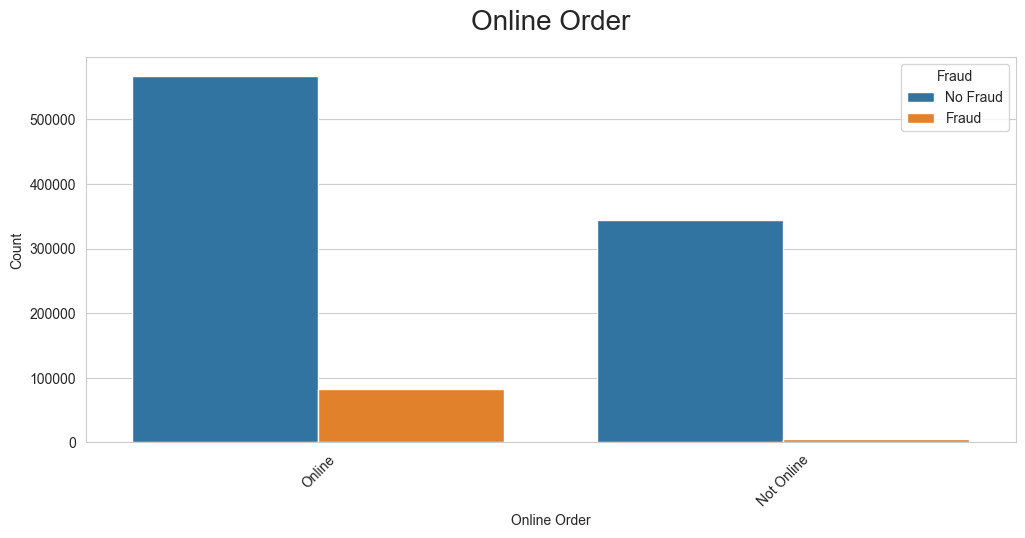

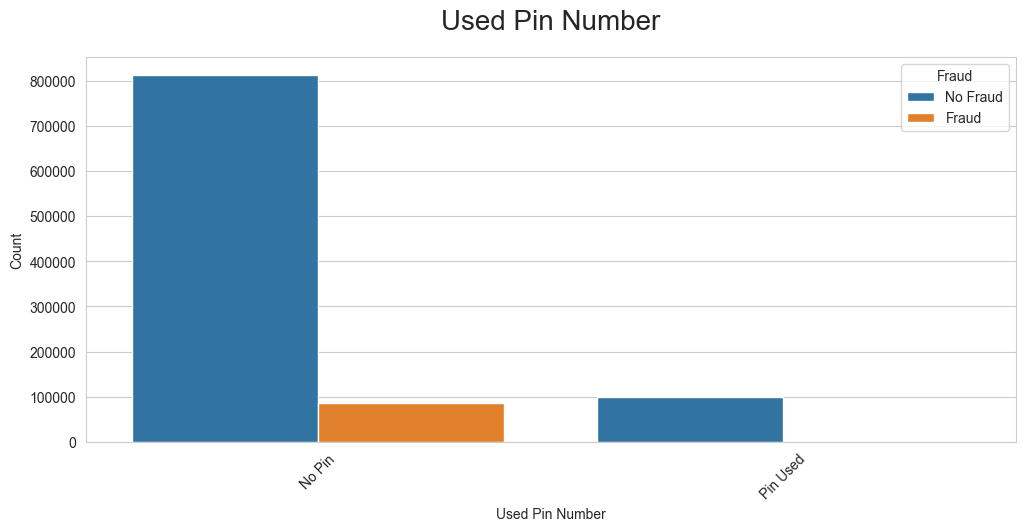

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var,
                  order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(f"{col.replace('_',' ').title()}")
    plt.title(f"{col.replace('_',' ').title()}", fontsize=20, y=1.05)
    plt.legend(title="Fraud")
    plt.show()

target_var = 'fraud'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")